# INSIALISASI DATASET DAN PUSTAKA 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from glob import glob
import re
import PIL
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DIR = r"Data Pengujian Komputasi_Resize\31 Data pengujian Komputasi"

# Path X-ray dan Mask
xray_dir = os.path.join(DIR, "X-Ray")
mask_dir = os.path.join(DIR, "Mask")

# Ambil semua gambar X-ray dan mask
lung_image_paths = glob(os.path.join(xray_dir, "*.png")) 
mask_image_paths = glob(os.path.join(mask_dir, "*.PNG"))

# Cek jumlah
print(f"Terdapat {len(lung_image_paths)} X-ray  and {len(mask_image_paths)} masks.")

Terdapat 31 X-ray  and 31 masks.


In [4]:
related_paths = defaultdict(list)

# Cek kesesuaian antara file X-ray dan Mask berdasarkan nama file
for img_path in lung_image_paths:
    # Ambil nama file dari path X-ray (tanpa .png)
    img_name = os.path.basename(img_path).replace('.png', '')  # Misal: "Data (72)"

    # Ekstrak nomor di dalam tanda kurung dari nama file X-ray
    img_number = img_name.split('(')[-1].split(')')[0].strip()  # Mengambil '72'

    for mask_path in mask_image_paths:
        # Ambil nama file dari path Mask (tanpa .PNG)
        mask_name = os.path.basename(mask_path).replace('.PNG', '')  # Misal: "mask_Data (379)"

        # Ekstrak nomor di dalam tanda kurung dari nama file Mask
        mask_number = mask_name.split('(')[-1].split(')')[0].strip()  # Mengambil '379'

        # Cek apakah nomor di dalam tanda kurung cocok
        if img_number == mask_number:
            # Jika cocok, simpan path gambar dan mask
            related_paths["image_path"].append(img_path)
            related_paths["mask_path"].append(mask_path)

# Konversi hasil pencocokan ke dalam DataFrame
paths_df = pd.DataFrame.from_dict(related_paths)

# Cek apakah DataFrame berisi data
print(paths_df.head())

                                          image_path  \
0  Data Pengujian Komputasi_Resize\31 Data penguj...   
1  Data Pengujian Komputasi_Resize\31 Data penguj...   
2  Data Pengujian Komputasi_Resize\31 Data penguj...   
3  Data Pengujian Komputasi_Resize\31 Data penguj...   
4  Data Pengujian Komputasi_Resize\31 Data penguj...   

                                           mask_path  
0  Data Pengujian Komputasi_Resize\31 Data penguj...  
1  Data Pengujian Komputasi_Resize\31 Data penguj...  
2  Data Pengujian Komputasi_Resize\31 Data penguj...  
3  Data Pengujian Komputasi_Resize\31 Data penguj...  
4  Data Pengujian Komputasi_Resize\31 Data penguj...  


In [6]:
paths_df.to_csv('path df_Semua DATA.csv', index=False)
print("paths_df berhasil disimpan ke file")

paths_df berhasil disimpan ke file


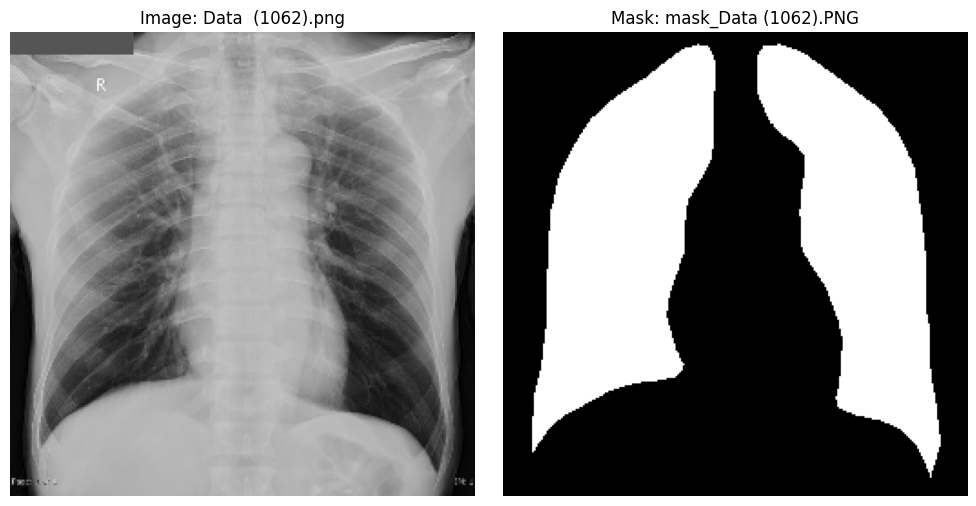

In [7]:
def display_image_mask(df, index):
  if index < 0 or index >= len(df):
    print(f"Index {index} out of bounds.")
    return

  img_path = df.loc[index, 'image_path']
  mask_path = df.loc[index, 'mask_path']

  try:
    img = PIL.Image.open(img_path)
    mask = PIL.Image.open(mask_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title(f"Image: {os.path.basename(img_path)}")
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='gray') # Mask biasanya binary atau grayscale
    axes[1].set_title(f"Mask: {os.path.basename(mask_path)}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

  except FileNotFoundError:
    print(f"File not found for index {index}. Image path: {img_path}, Mask path: {mask_path}")
  except Exception as e:
    print(f"An error occurred: {e}")
display_image_mask(paths_df, 0)

In [8]:
nama_dir = r"Data Pengujian Komputasi_Resize\31 Data pengujian Komputasi\X-Ray"
namafile_paths = sorted(glob(os.path.join(xray_dir, "*.png")))
# Simpan hanya nama file (tanpa path)
filenames = [os.path.basename(f) for f in namafile_paths]
print(filenames[:5])  

['Data  (1062).png', 'Data  (1063).png', 'Data  (1065).png', 'Data  (1066).png', 'Data  (1067).png']


# KONVERSI PADA ARRAY BENTUK 4 DIMENSI 

In [9]:
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm

def prepare_train_test(df=pd.DataFrame(), color_mode="gray"):
    img_array = []
    mask_array = []

    # Proses gambar
    for image_path in tqdm(df.image_path, desc="Loading images"):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = image / 255.0
        img_array.append(image)

    # Proses mask
    for mask_path in tqdm(df.mask_path, desc="Loading masks"):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = mask / 255.0
        mask_array.append(mask)

    # Konversi ke NumPy array
    img_array = np.array(img_array)
    mask_array = np.array(mask_array)
    return img_array, mask_array

img_array, mask_array = prepare_train_test(df=paths_df, color_mode="gray")

print(f"Image array shape: {img_array.shape}")
print(f"Mask array shape: {mask_array.shape}")

Loading masks: 100%|██████████| 31/31 [00:00<00:00, 398.75it/s]

Image array shape: (31, 256, 256)
Mask array shape: (31, 256, 256)


In [10]:
img_side_size = 256
img_array = np.array(img_array).reshape(len(img_array), img_side_size, img_side_size, 1)
mask_array = np.array(mask_array).reshape(len(mask_array), img_side_size, img_side_size, 1)
print(f"ukuran dimensi  X Ray: {img_array.shape}")
print(f"ukuran dimensi Mask : {mask_array.shape}")

ukuran dimensi  X Ray: (31, 256, 256, 1)
ukuran dimensi Mask : (31, 256, 256, 1)


In [11]:
print ("BENTUK SEBELUM DIKONVERSI")
print(f"Image array dtype: {img_array.dtype}")
print(f"Mask array dtype: {mask_array.dtype}")

BENTUK SEBELUM DIKONVERSI
Image array dtype: float64
Mask array dtype: float64


In [12]:
# Mengkonversi  tipe data float32
img_array = img_array.astype('float32')
mask_array = mask_array.astype('float32')
print ("BENTUK SETELAH  DIKONVERSI")
print(f"Image array dtype: {img_array.dtype}")
print(f"Mask array dtype: {mask_array.dtype}")

BENTUK SETELAH  DIKONVERSI
Image array dtype: float32
Mask array dtype: float32


# DEPLOYMENT MODEL 


In [13]:
from tensorflow.keras.models import load_model

model = load_model(r'Model AI\U-Net.h5') # ini adalah model U-Net
model2 = load_model(r'Model AI\L-UNet.h5') #ini adalah model L-UNet
print("Model berhasil dimuat.") # untuk memastikan model telah dimuat dengan benar

Model berhasil dimuat.


## MODEL U-Net 

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Rata-rata IoU: 0.9100
Rata-rata Akurasi: 0.9734


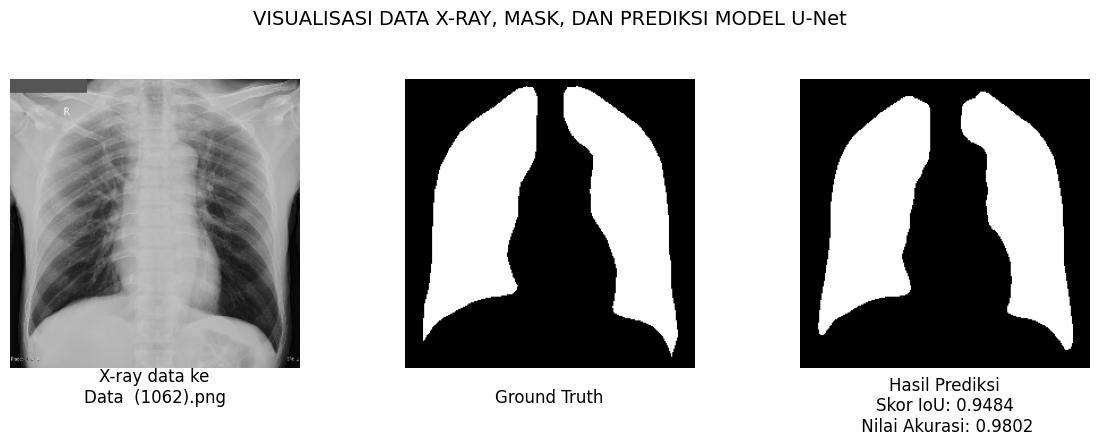

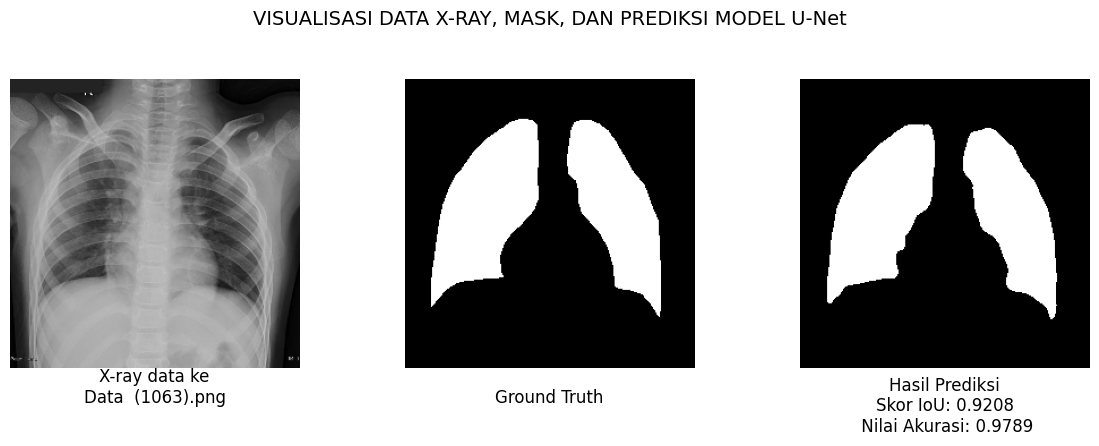

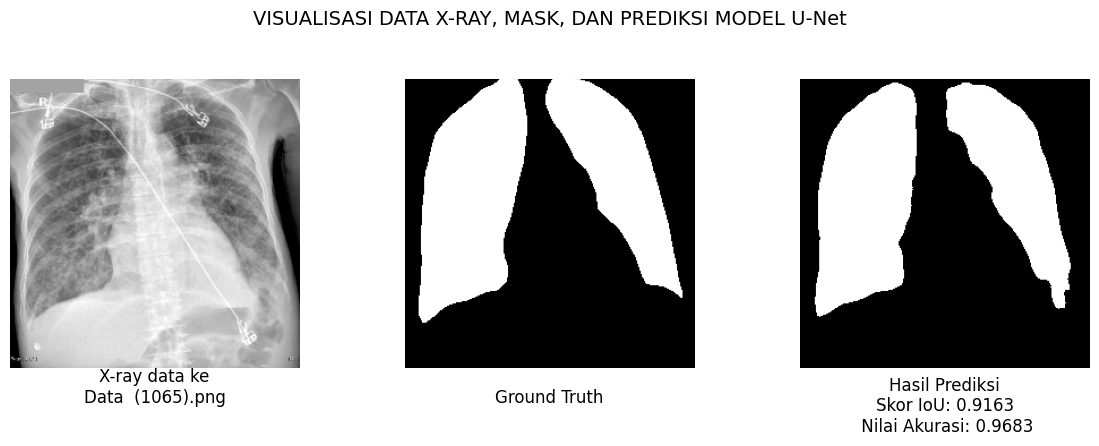

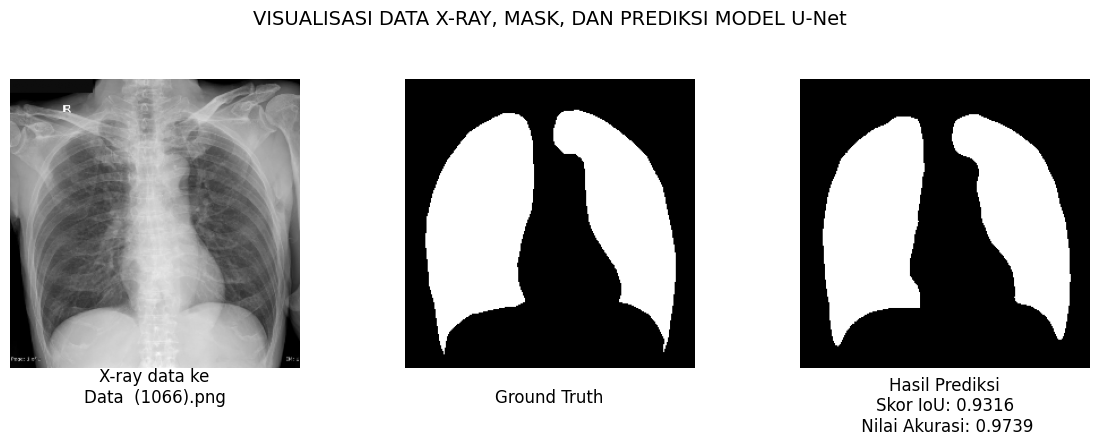

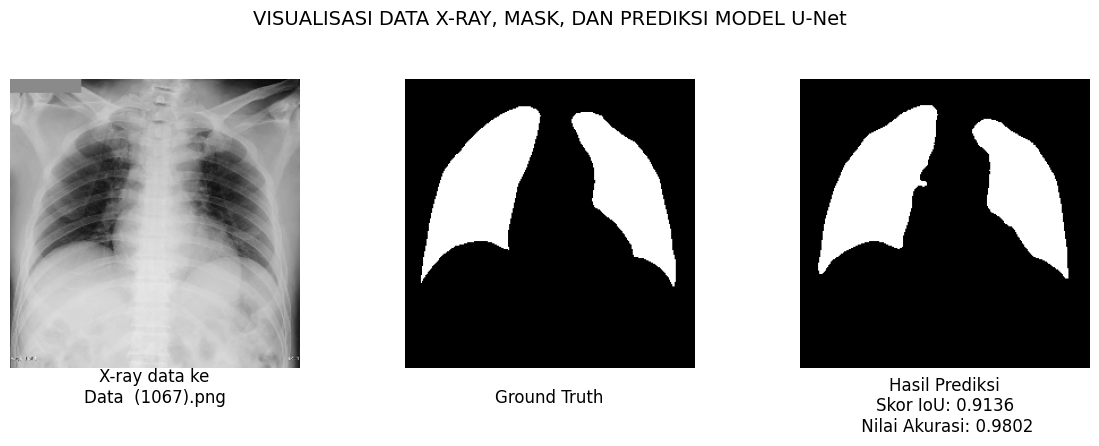

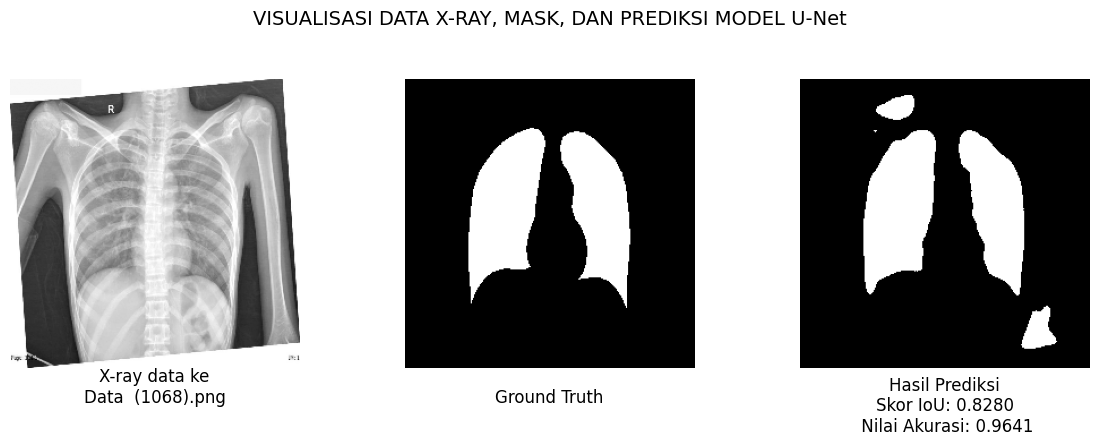

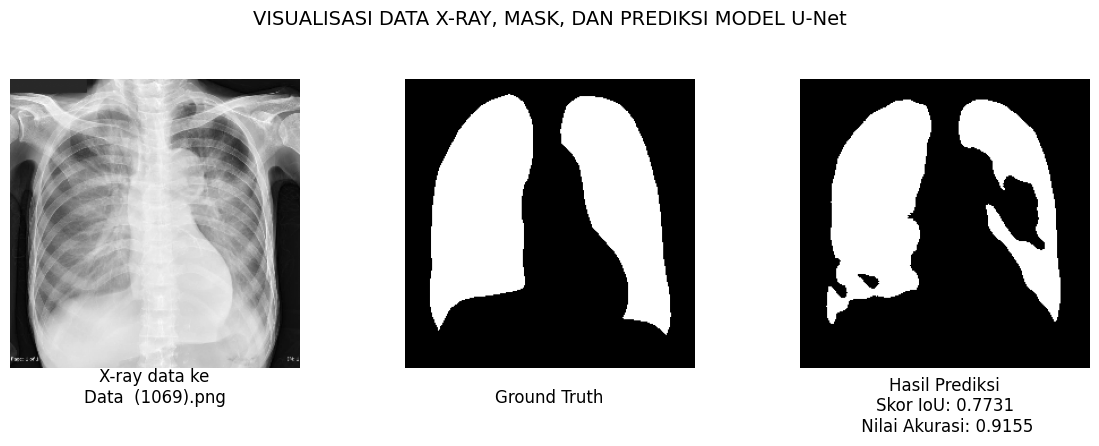

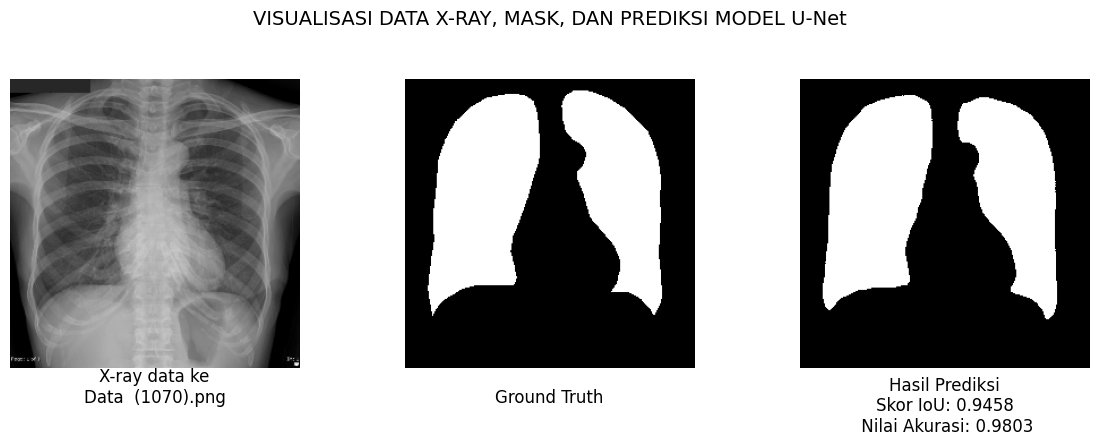

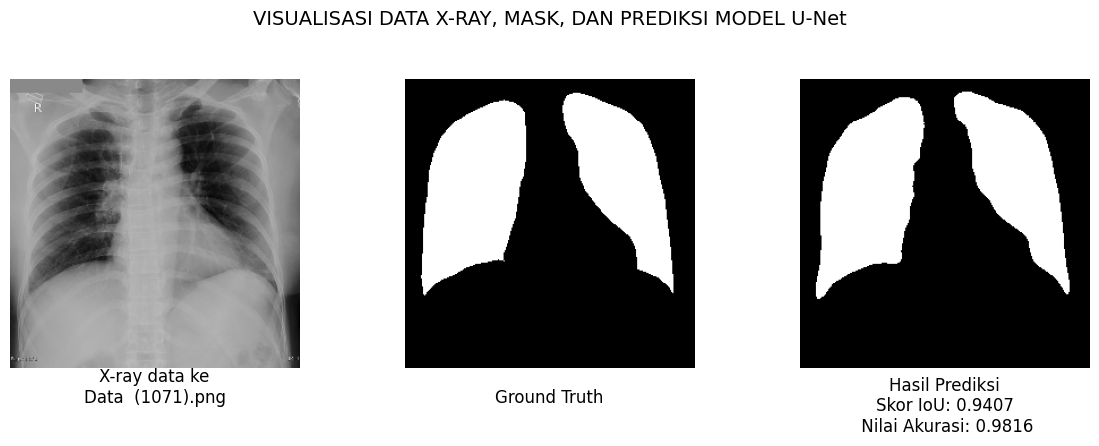

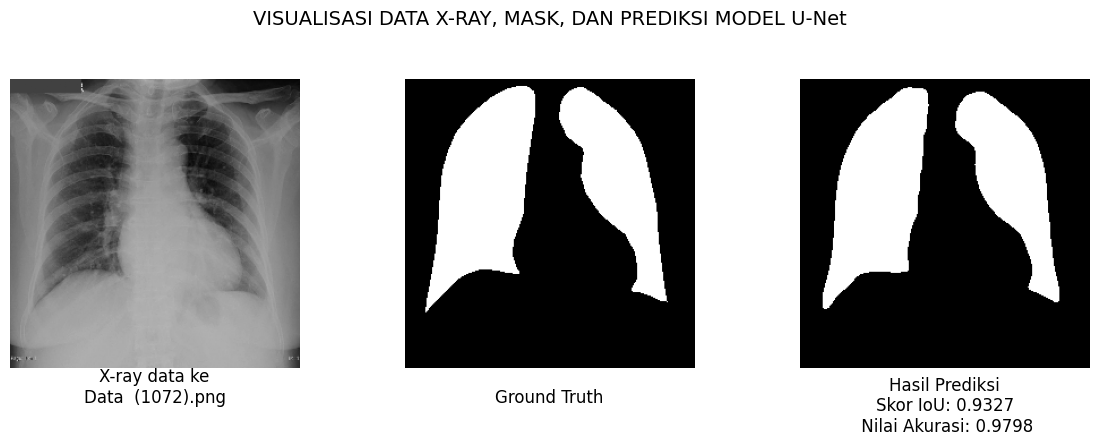

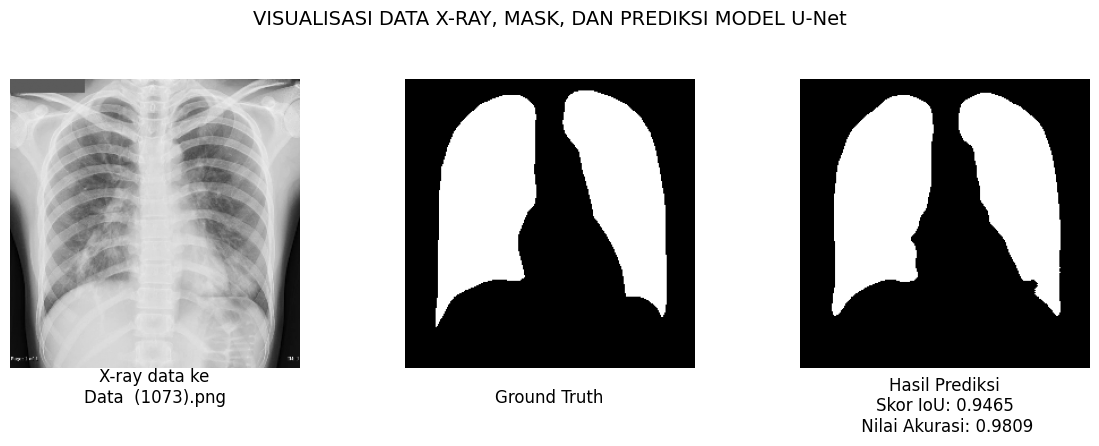

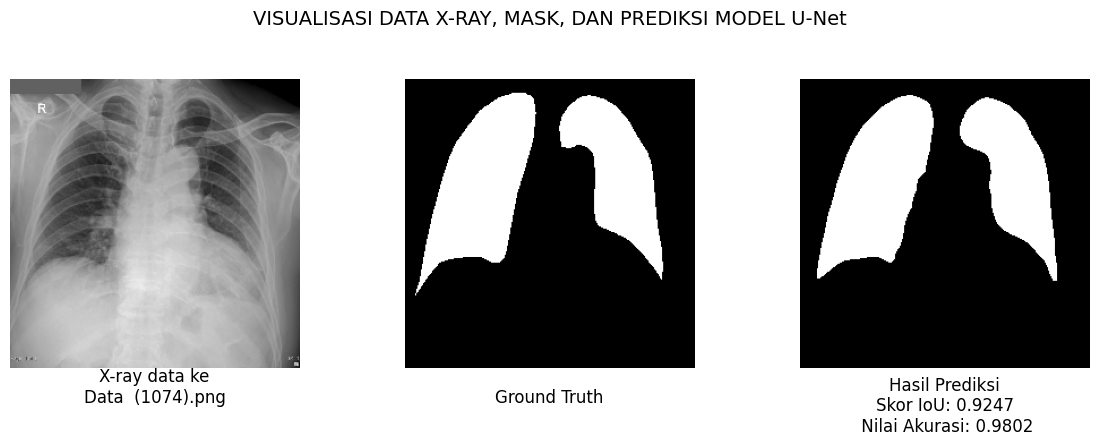

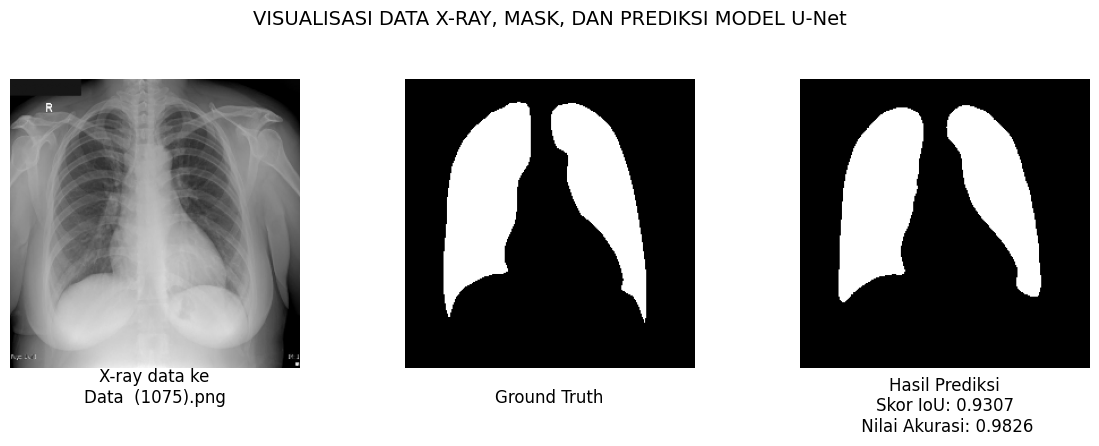

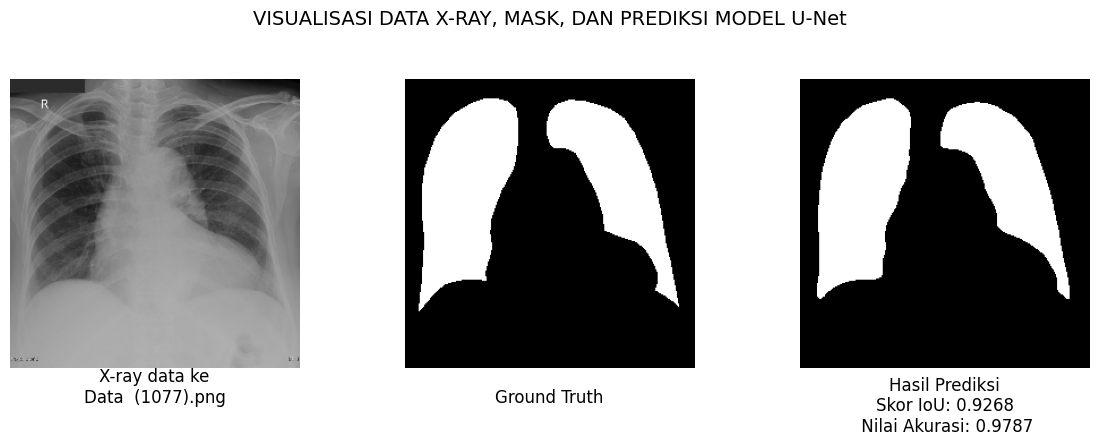

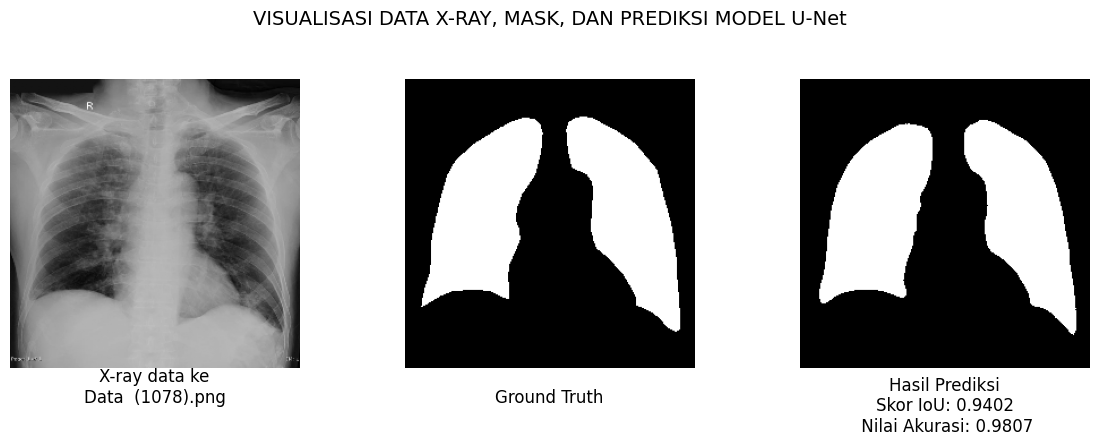

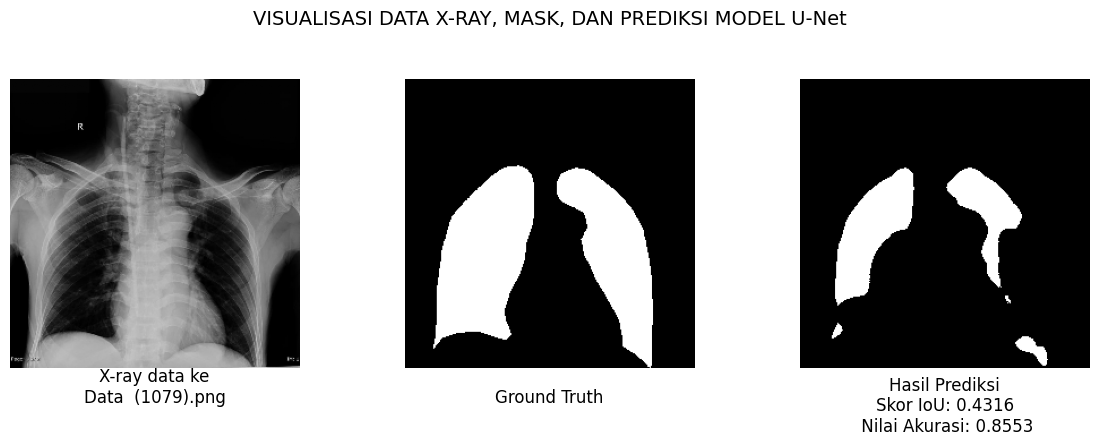

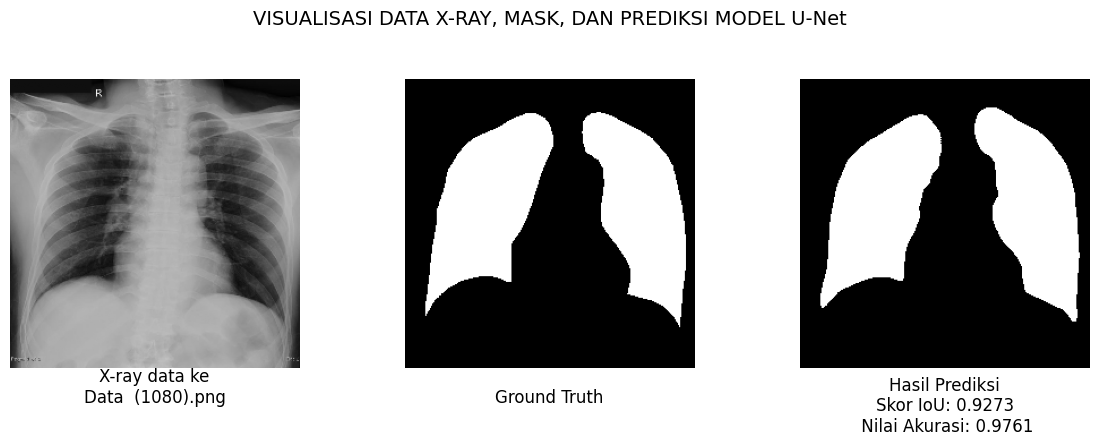

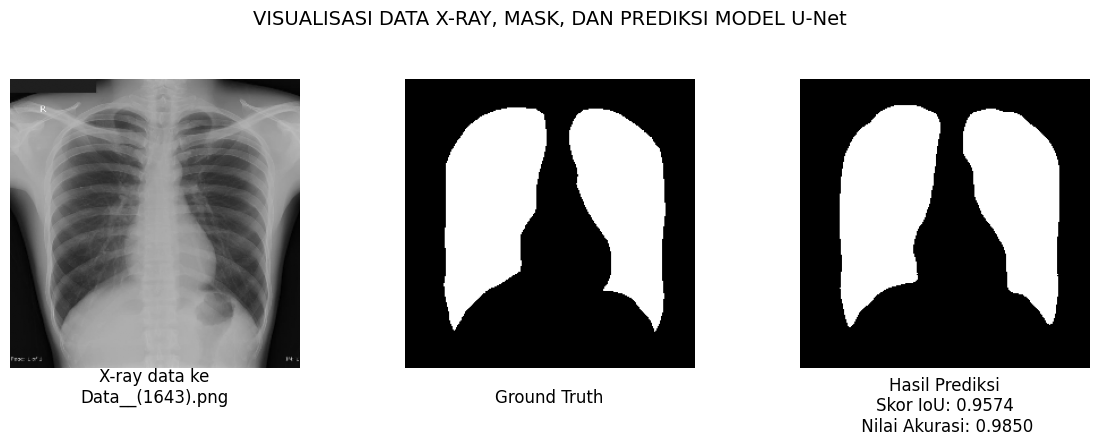

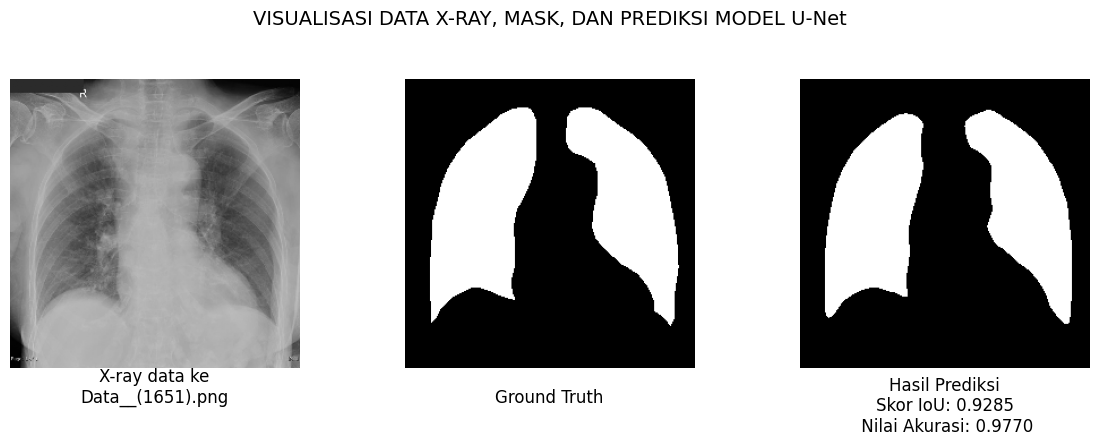

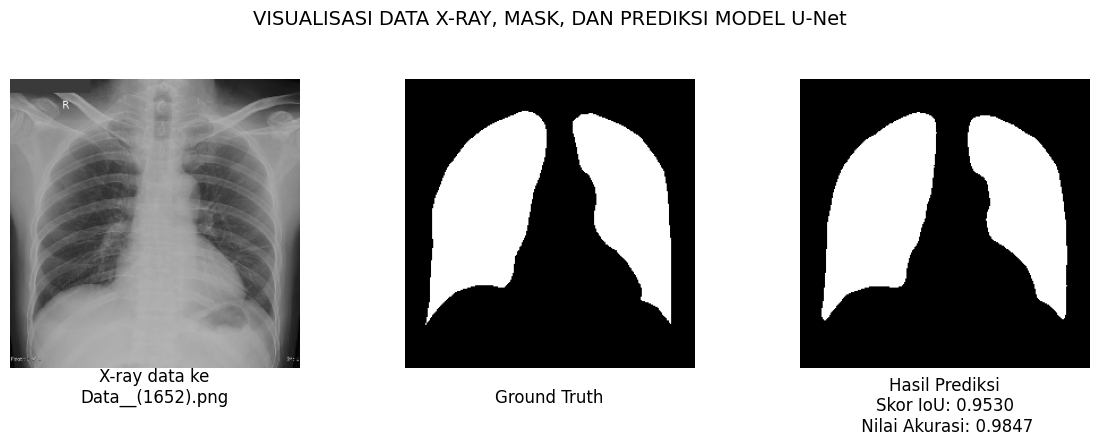

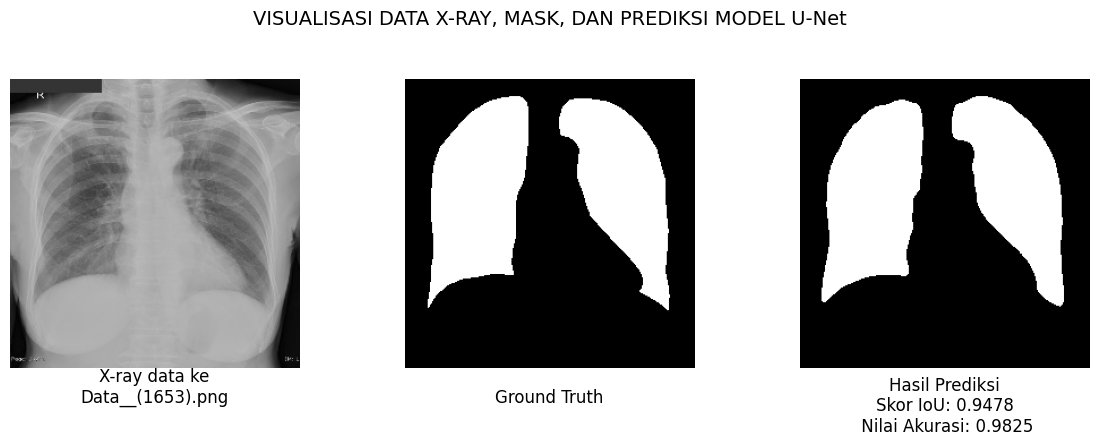

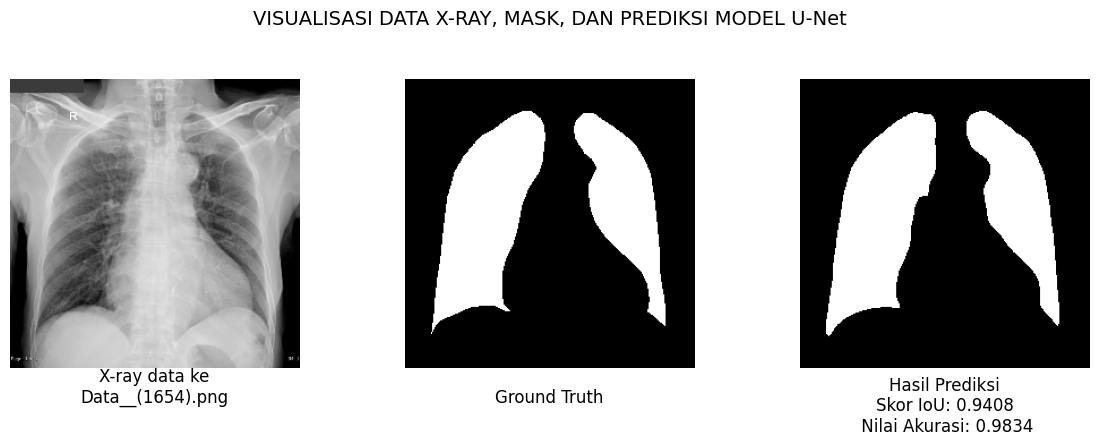

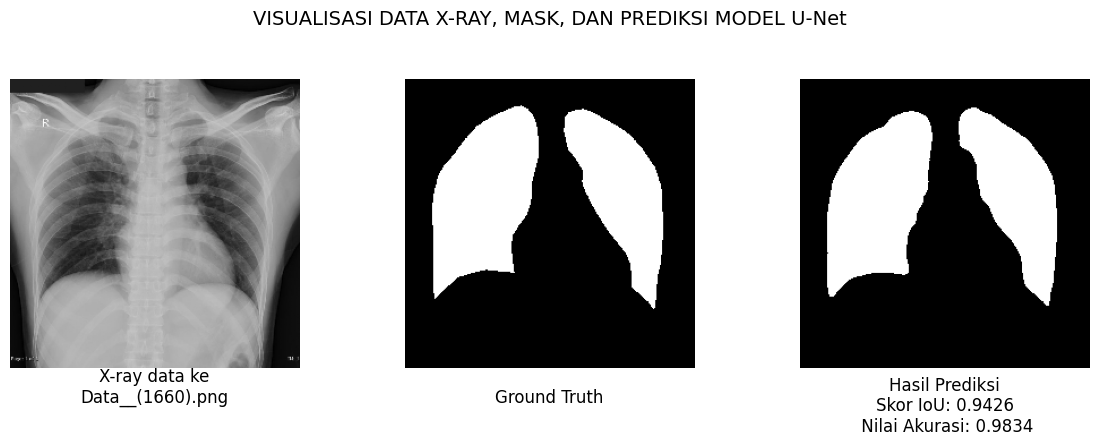

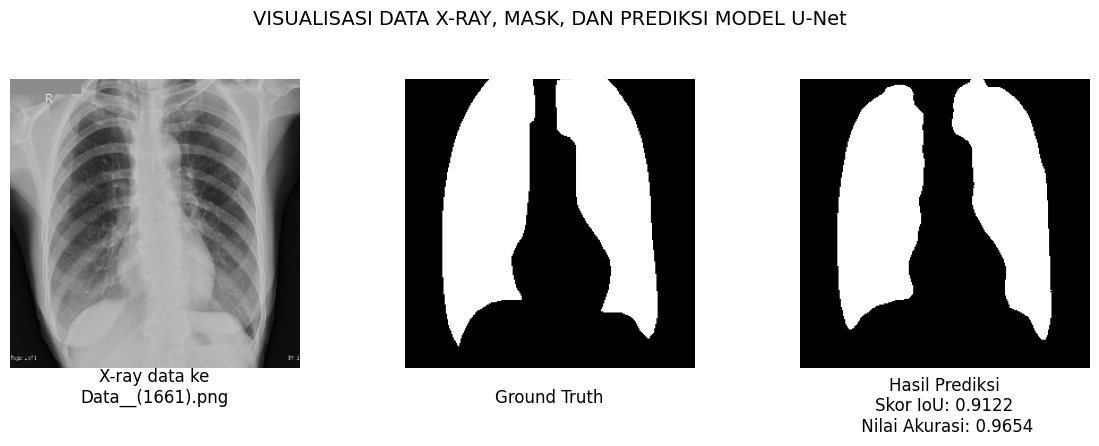

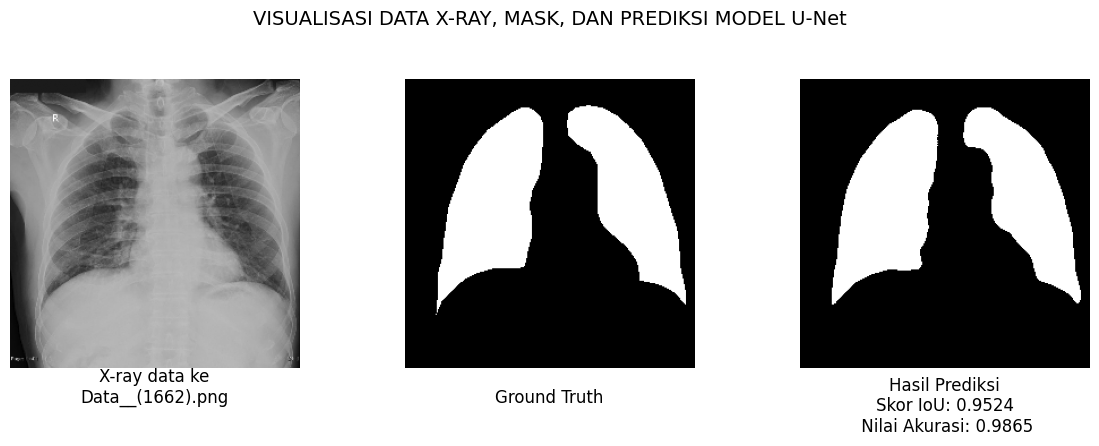

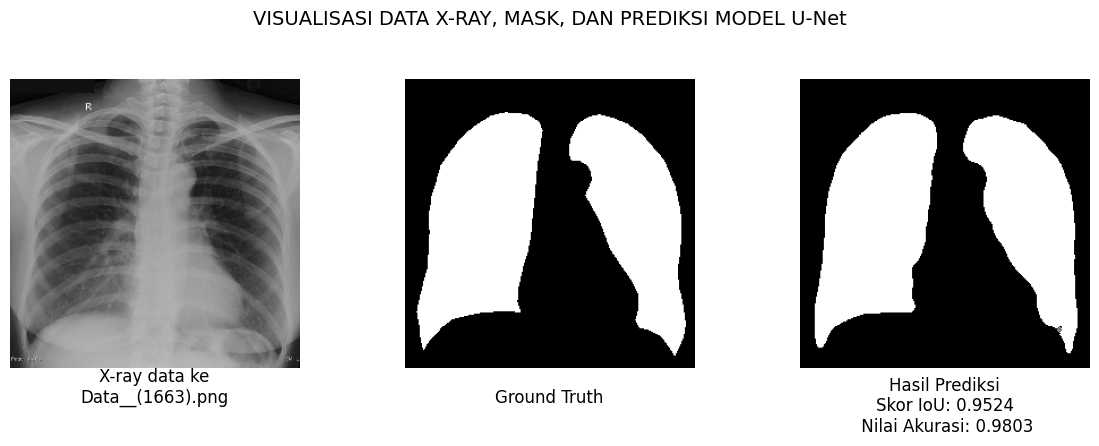

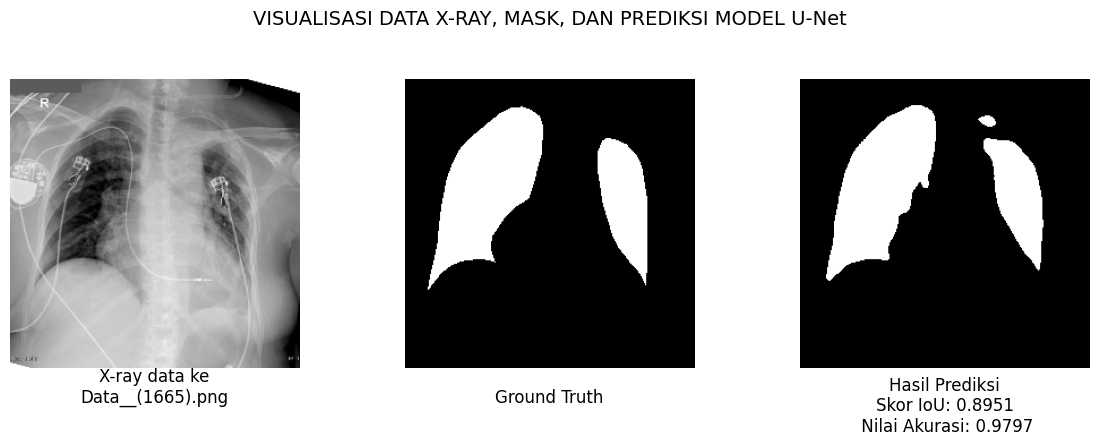

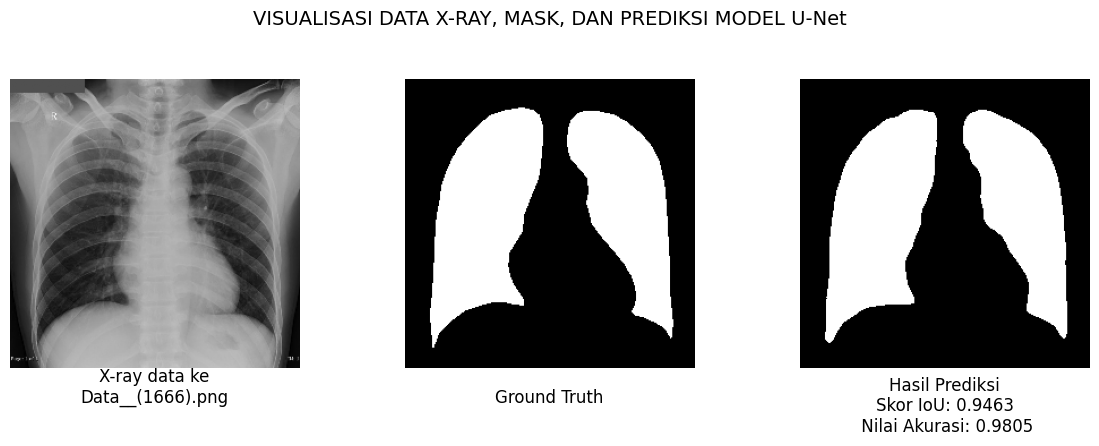

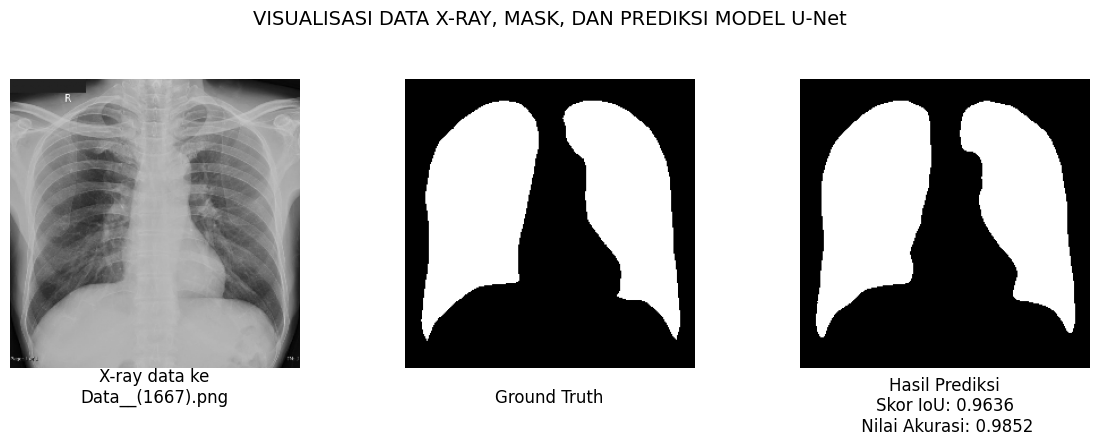

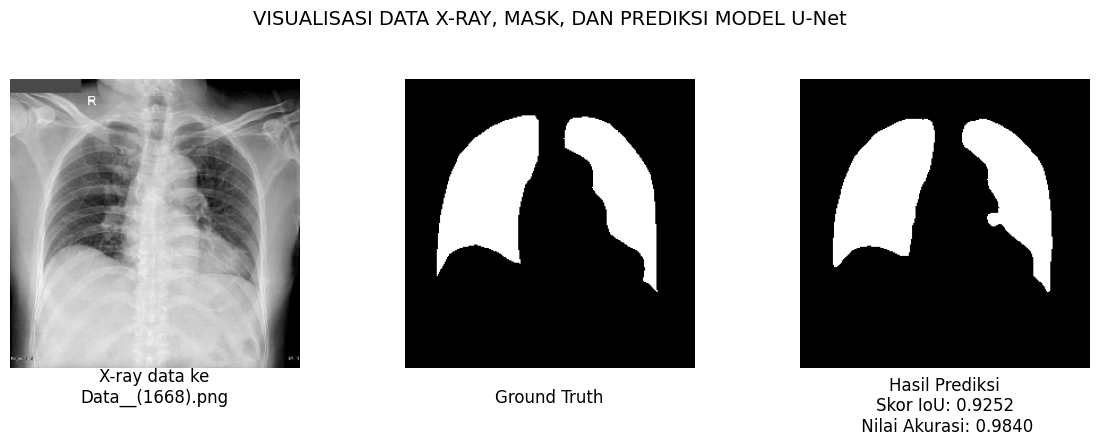

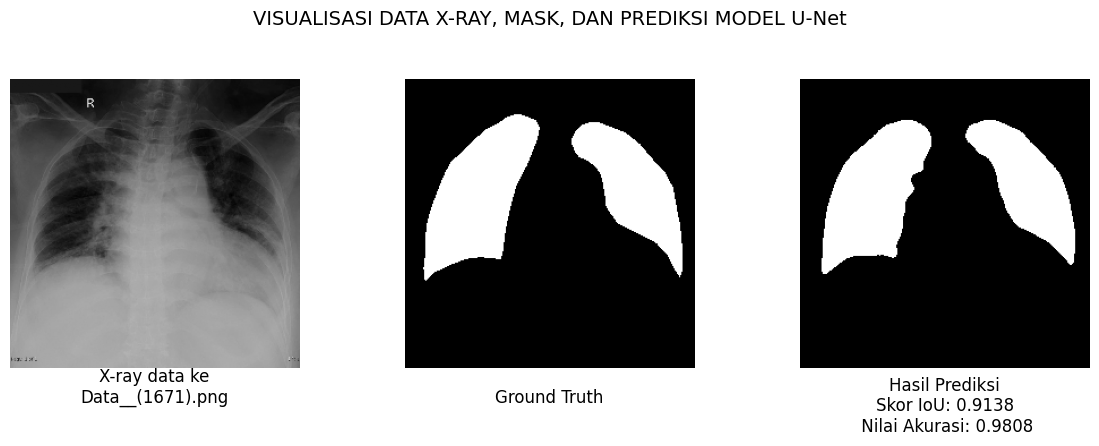

Semua visualisasi telah disimpan di folder: Visualisasi hasil prediksi\U-Net


In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model


# --- 3. Hitung IoU & Akurasi ---
binary_iou = tf.keras.metrics.BinaryIoU(target_class_ids=[1], threshold=0.5)
accuracy = tf.keras.metrics.BinaryAccuracy()

iou_scores, accuracy_scores = [], []
# --- 2. Prediksi ---
predicted_masks = model.predict(img_array)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)

for i in range(len(img_array)):
    binary_iou.update_state(mask_array[i], predicted_masks[i])
    iou_scores.append(binary_iou.result().numpy())
    binary_iou.reset_state()

    accuracy.update_state(mask_array[i], predicted_masks[i])
    accuracy_scores.append(accuracy.result().numpy())
    accuracy.reset_state()

print(f"Rata-rata IoU: {np.mean(iou_scores):.4f}")
print(f"Rata-rata Akurasi: {np.mean(accuracy_scores):.4f}")

# --- 4. Visualisasi ---
save_dir = r"Visualisasi hasil prediksi\U-Net"  

for i in range(len(img_array)):
    plt.figure(figsize=(12, 4))
    plt.suptitle("VISUALISASI DATA X-RAY, MASK, DAN PREDIKSI MODEL U-Net", fontsize=14, y=1.05)

    # X-ray
    plt.subplot(1, 3, 1)
    plt.imshow(img_array[i].squeeze(), cmap='gray')
    plt.title(f"X-ray data ke\n{filenames[i]}", y=-0.15)
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(mask_array[i].squeeze(), cmap='gray')
    plt.title("Ground Truth", y=-0.15)
    plt.axis("off")

    # Prediksi
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
    plt.title(f"Hasil Prediksi\nSkor IoU: {iou_scores[i]:.4f}\n Nilai Akurasi: {accuracy_scores[i]:.4f}", y=-0.25)
    plt.axis("off")

    plt.tight_layout()

    # Simpan dulu
    save_path = os.path.join(save_dir, f"visualisasi_prediksi_{i+1}_{filenames[i]}.png")
    plt.savefig(save_path, bbox_inches="tight", dpi=150)

    # Tampilkan (opsional)
    plt.show()

    plt.close()

print("Semua visualisasi telah disimpan di folder:", save_dir)

## MODEL L-UNET

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Rata-rata IoU: 0.9181
Rata-rata Akurasi: 0.9751


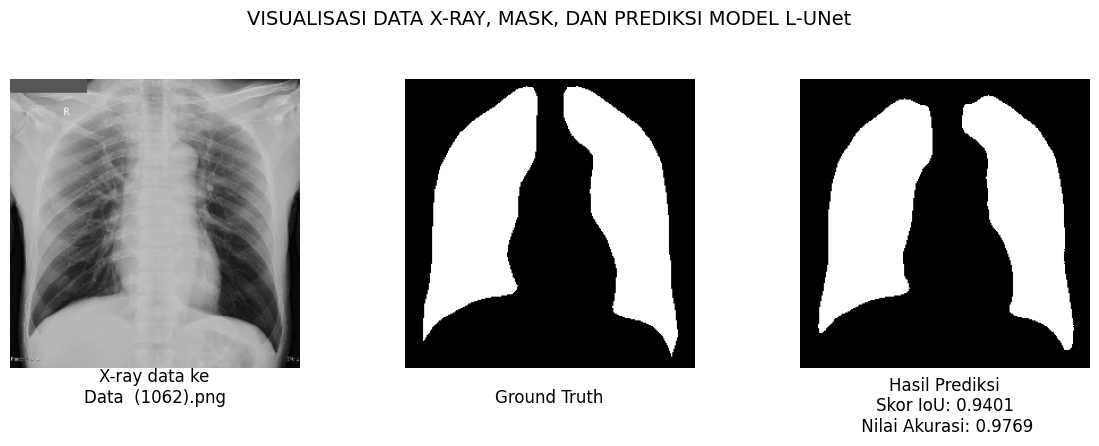

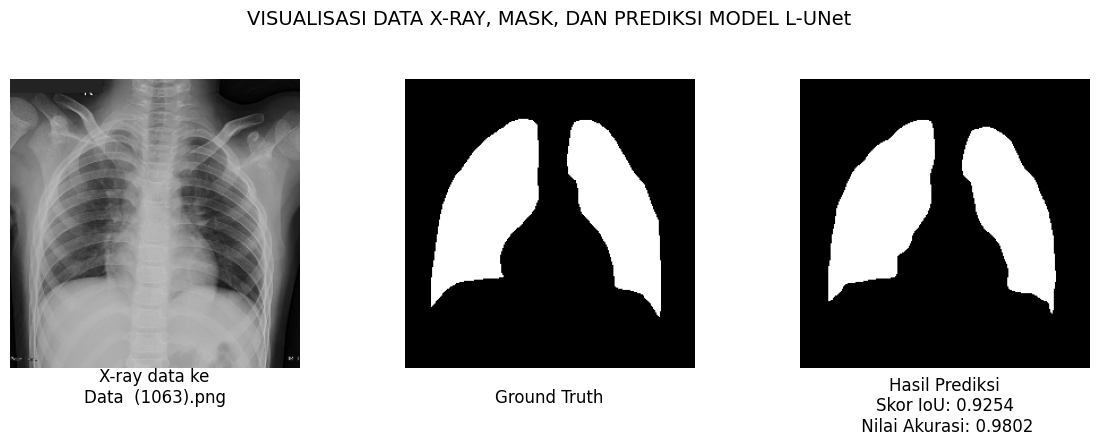

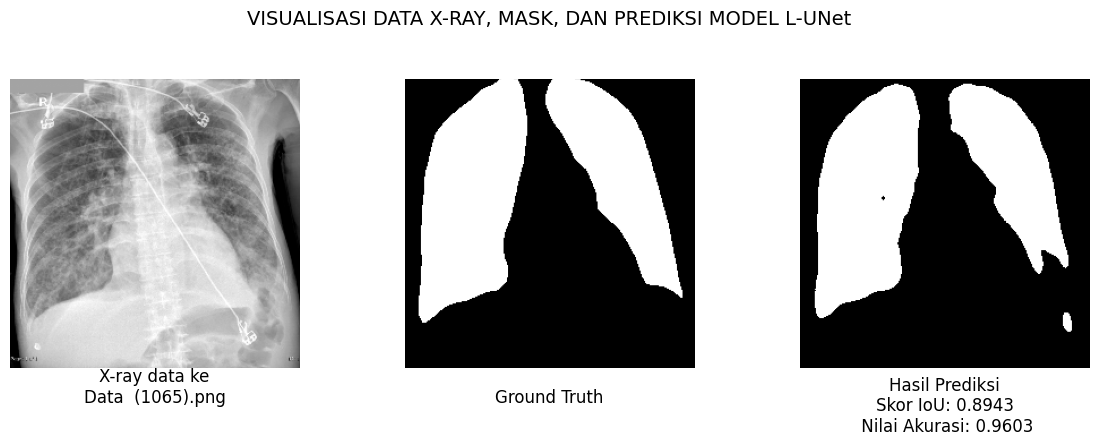

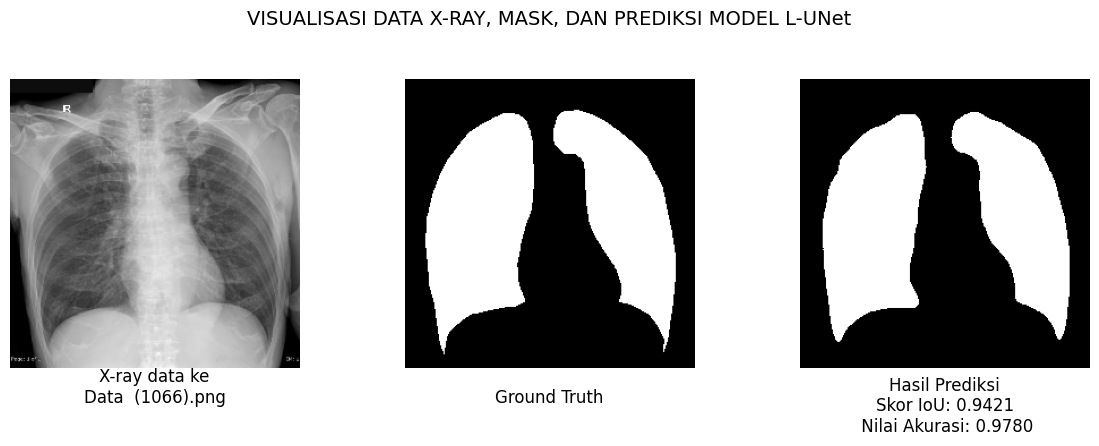

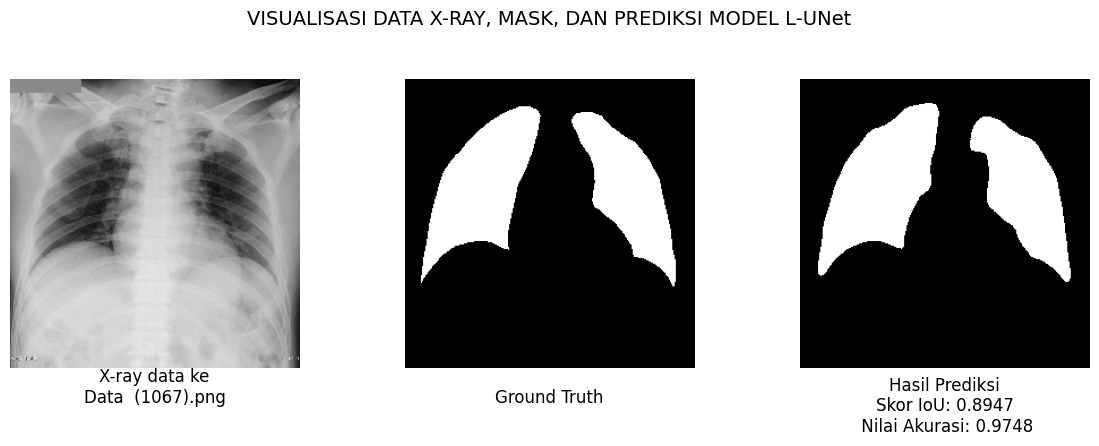

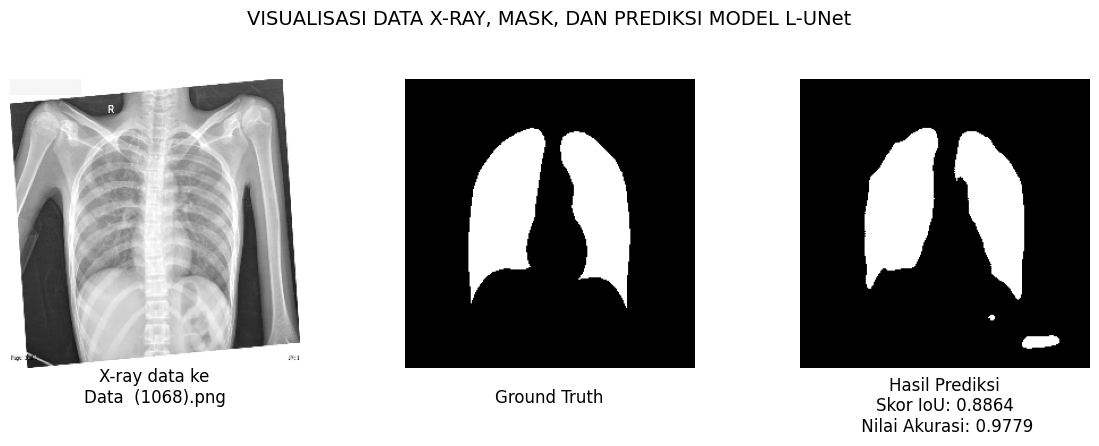

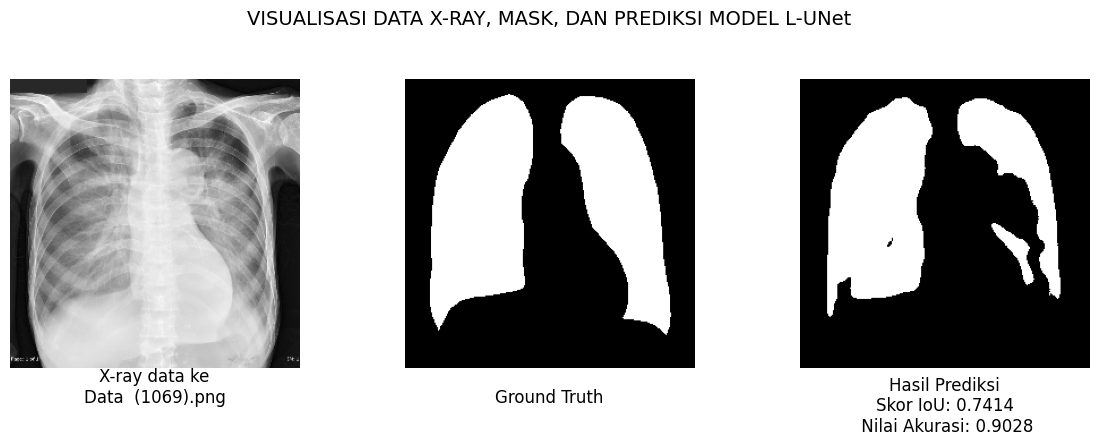

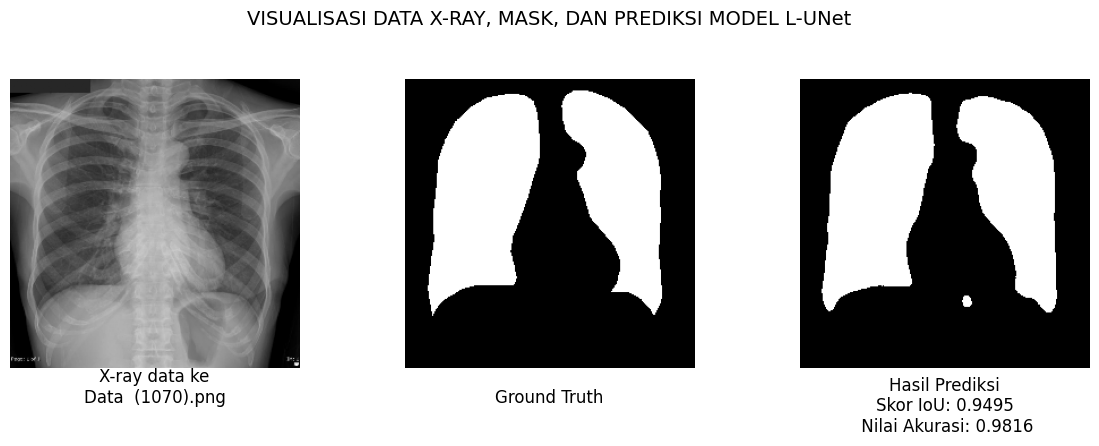

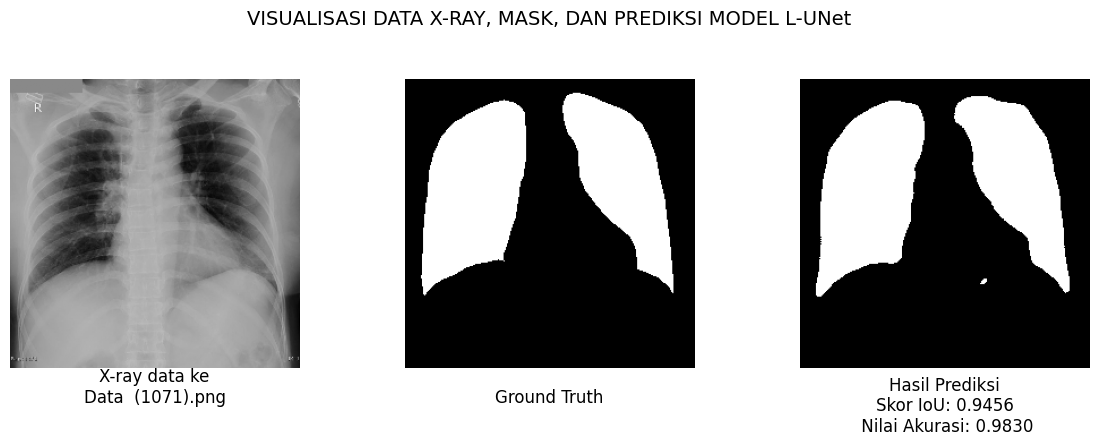

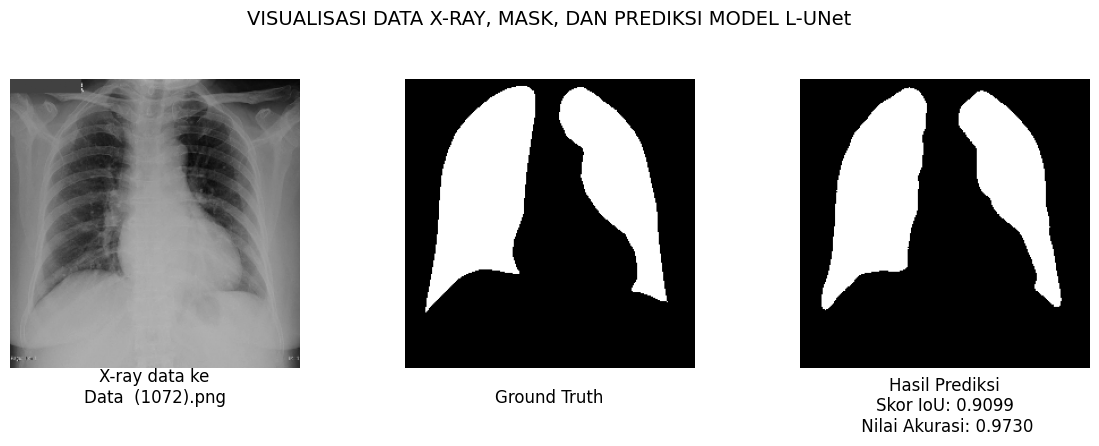

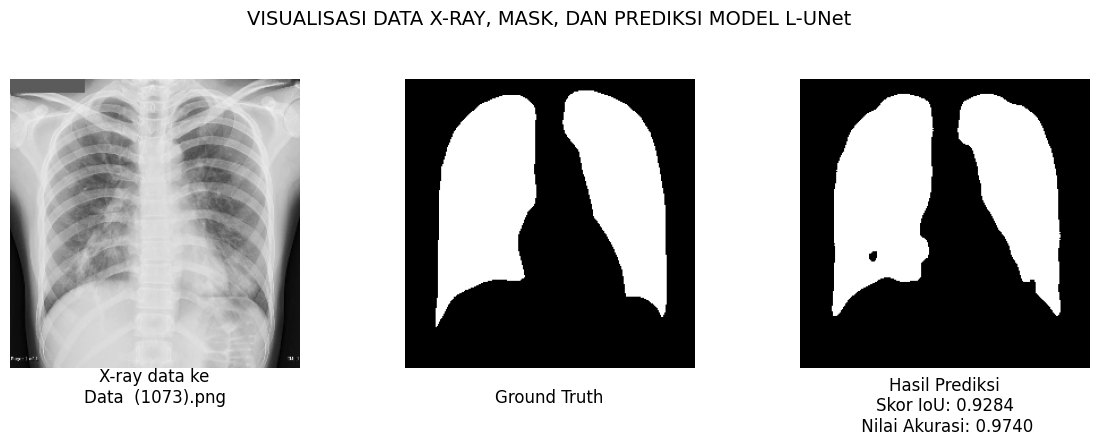

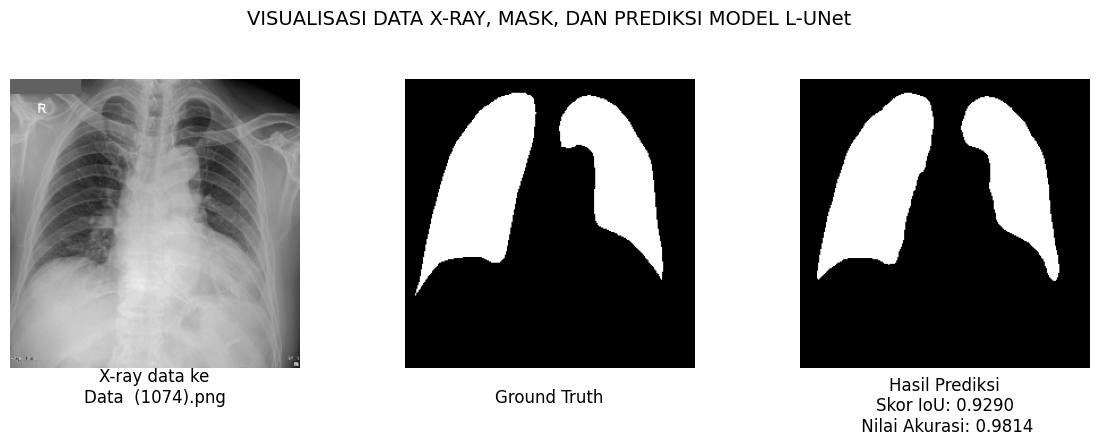

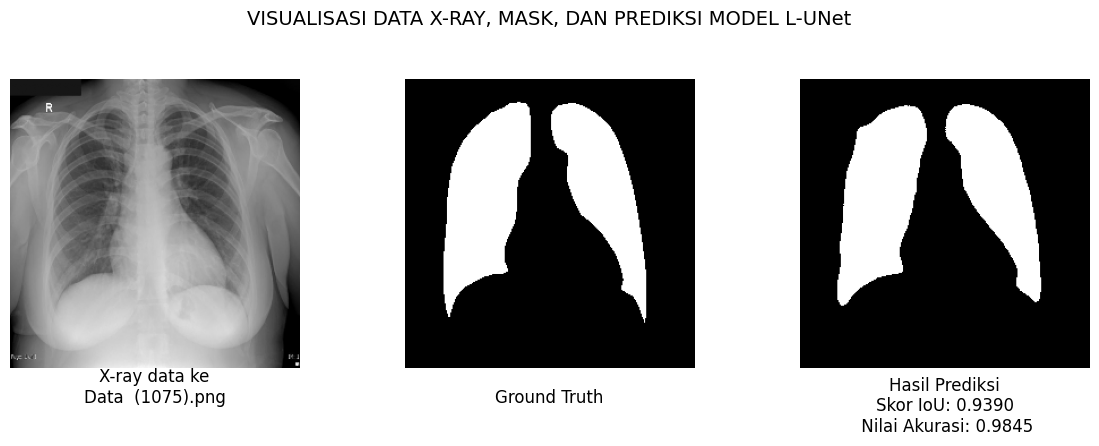

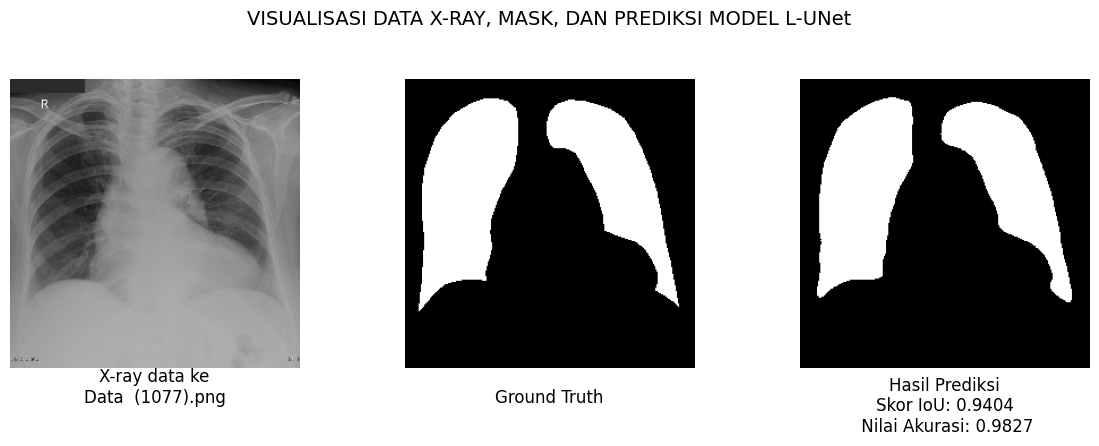

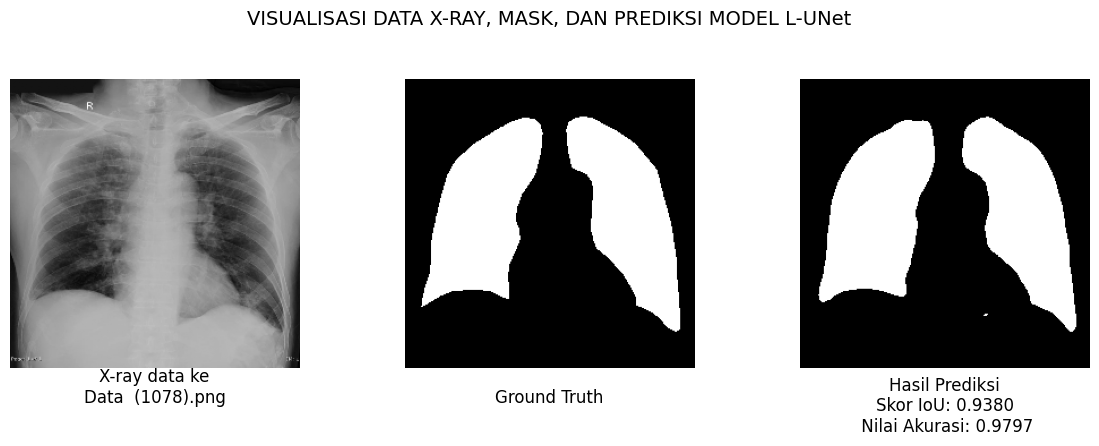

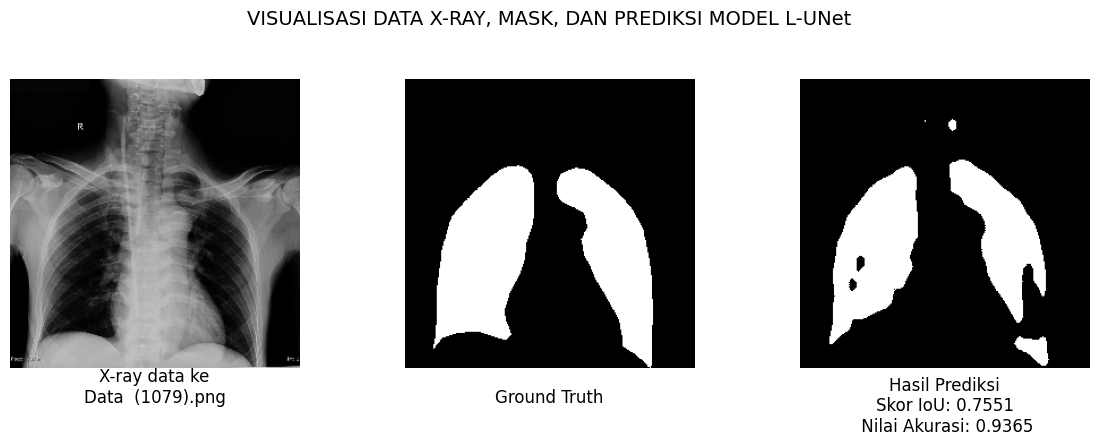

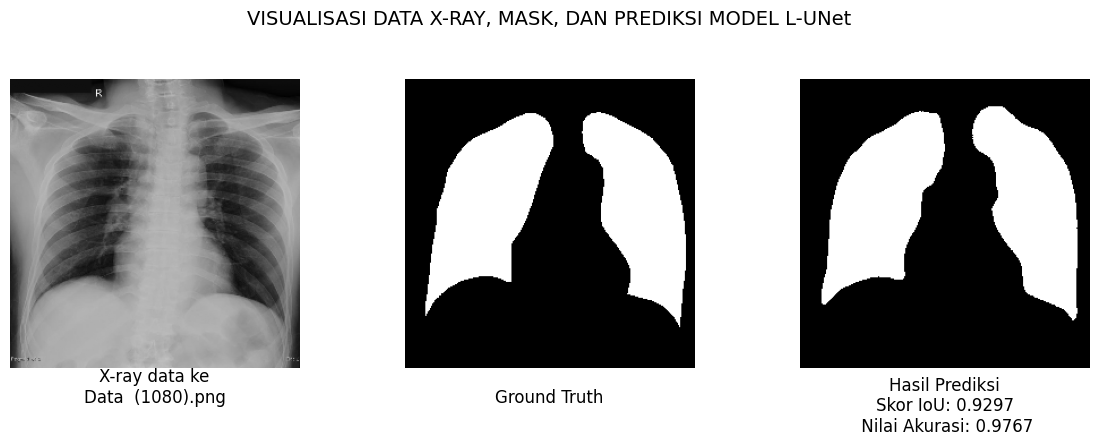

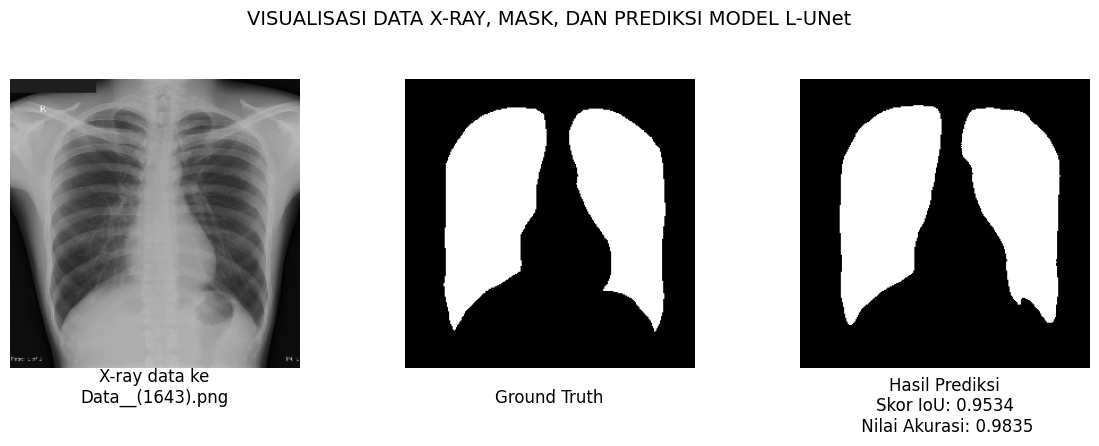

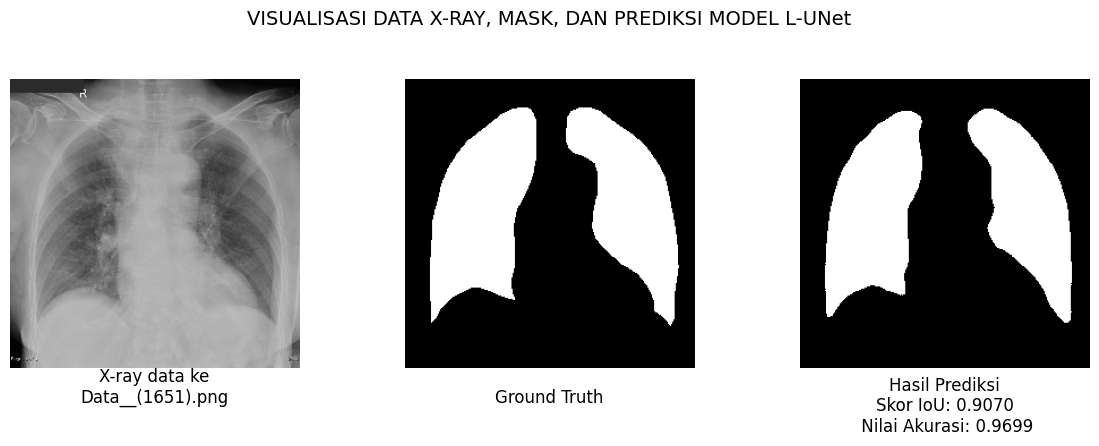

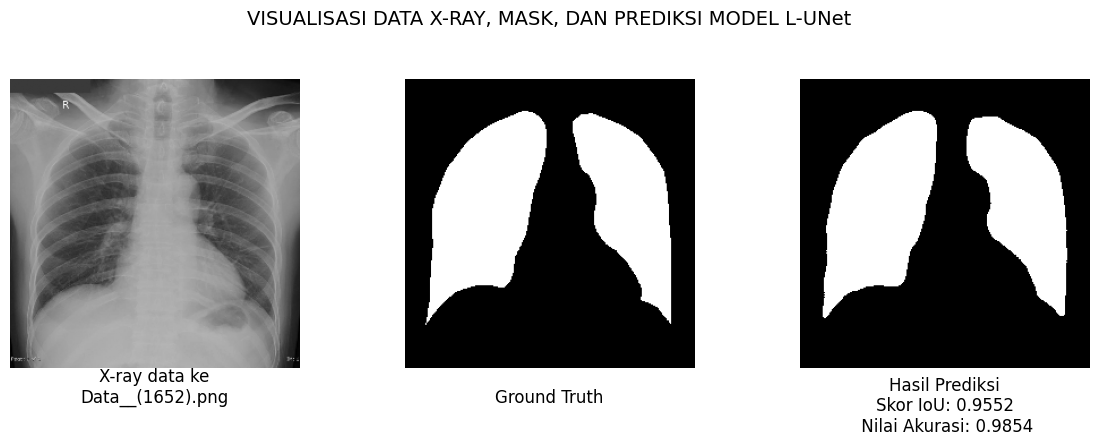

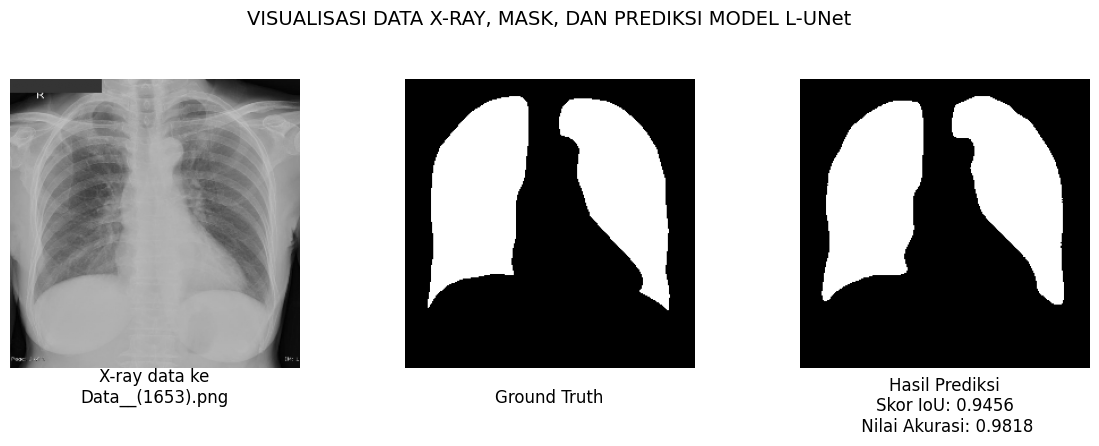

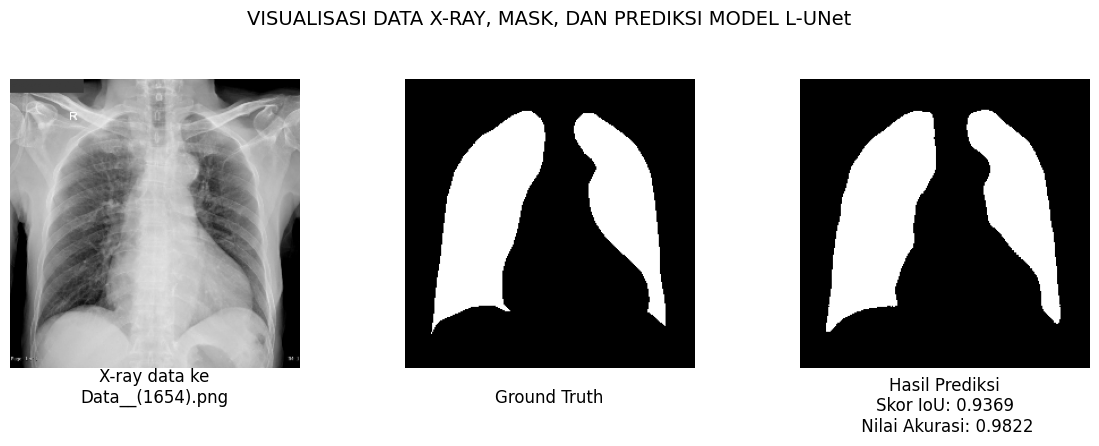

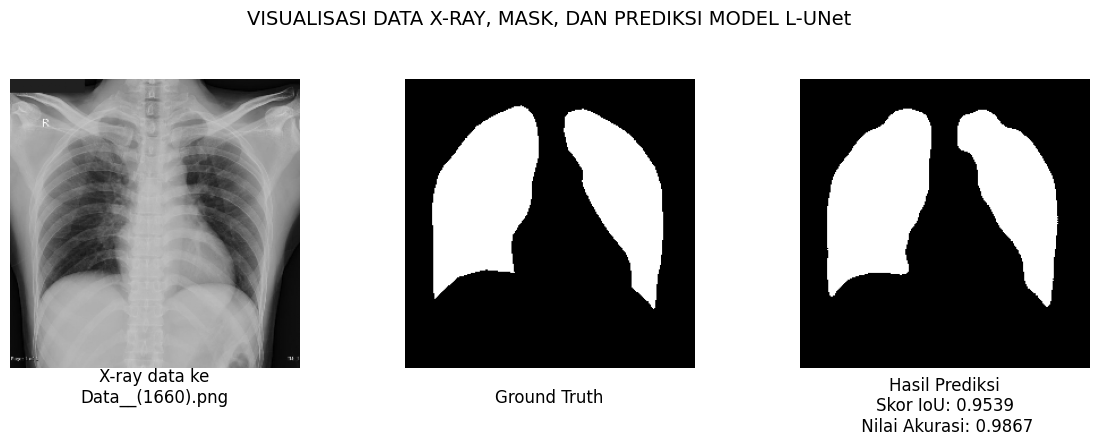

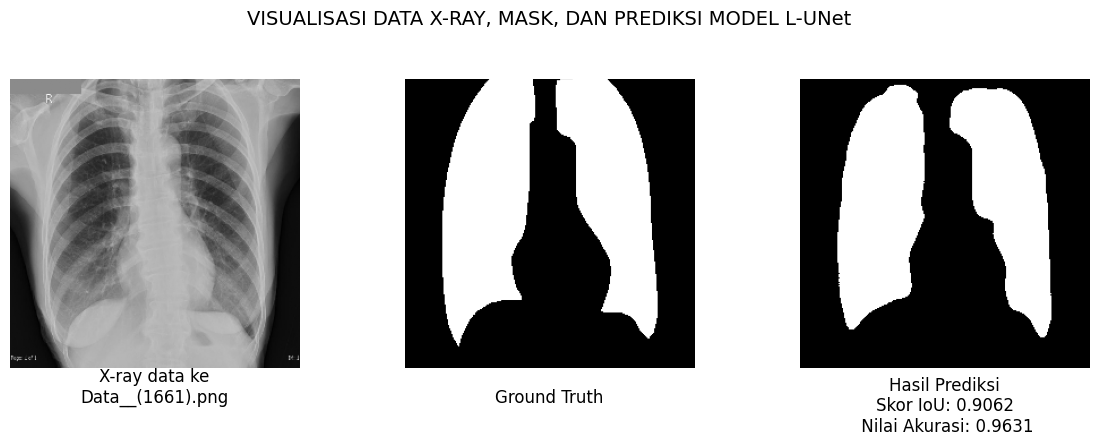

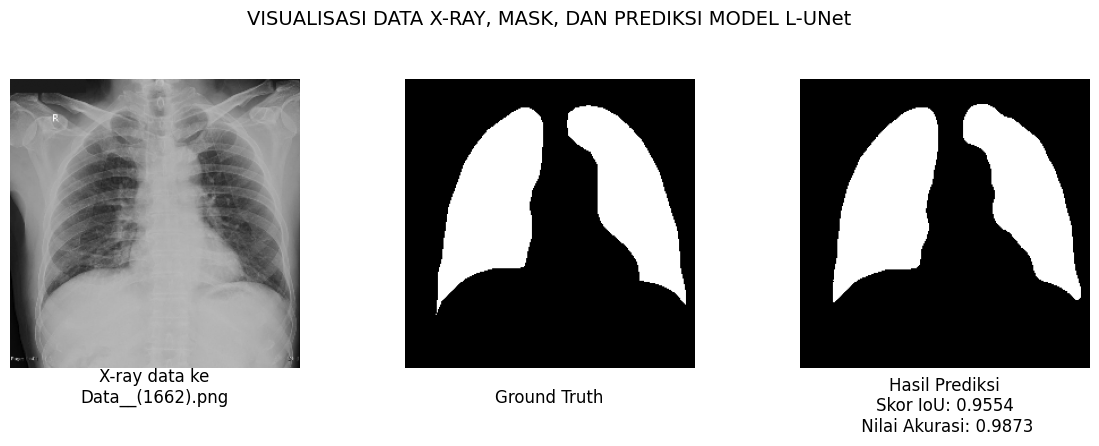

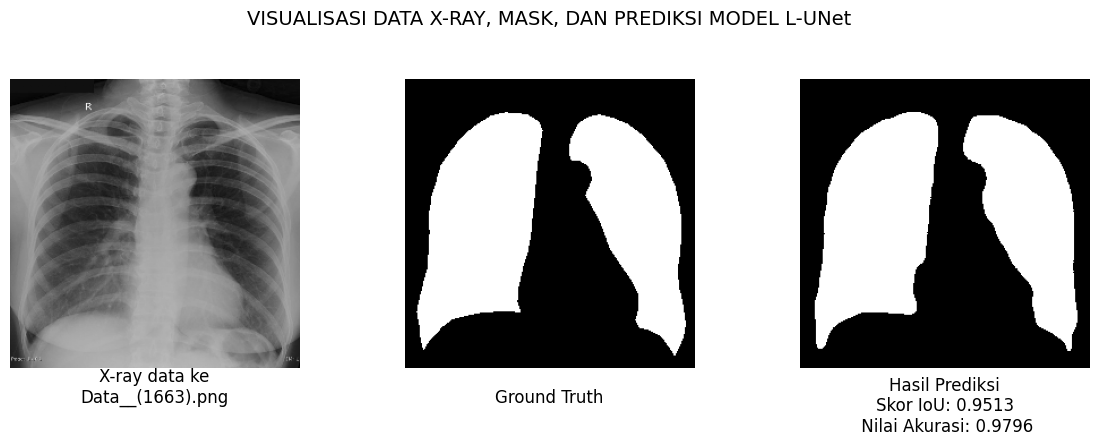

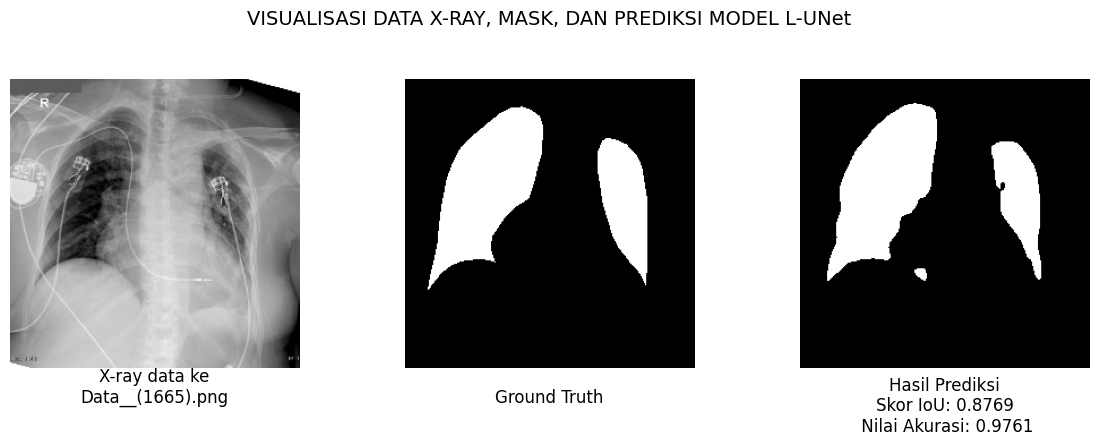

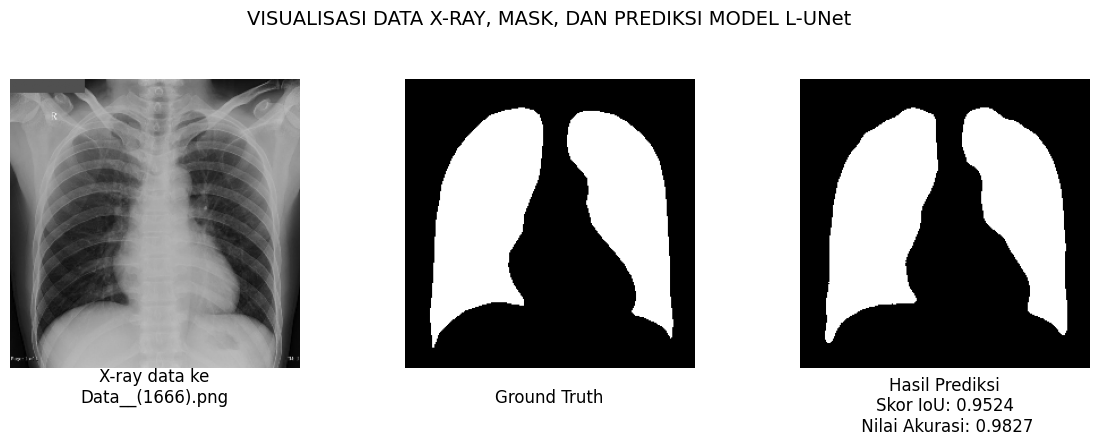

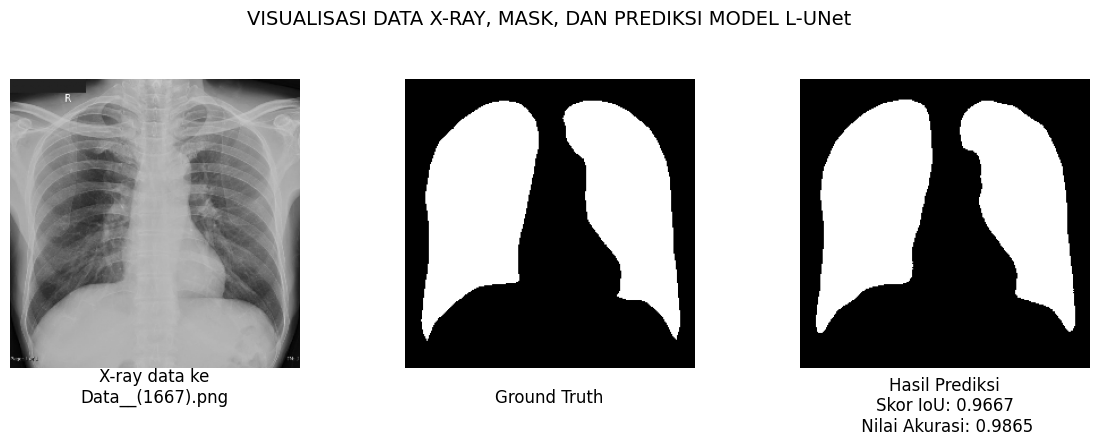

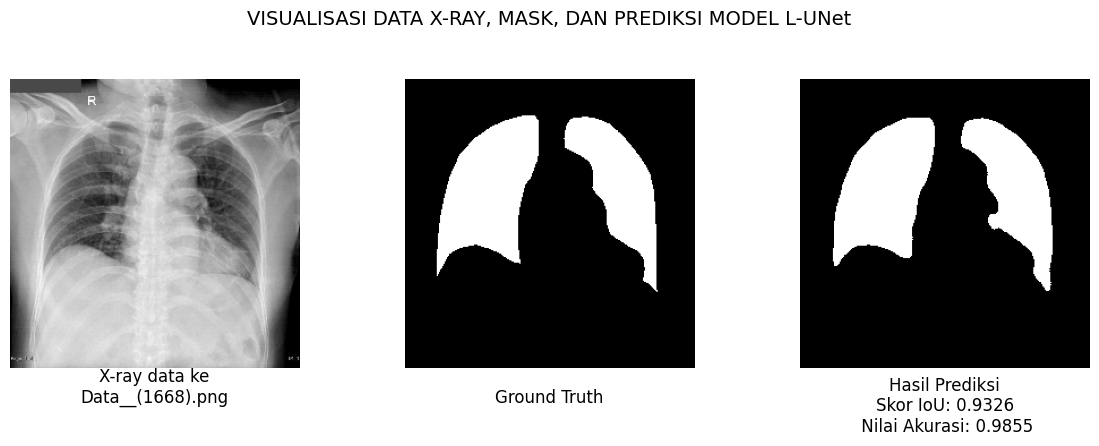

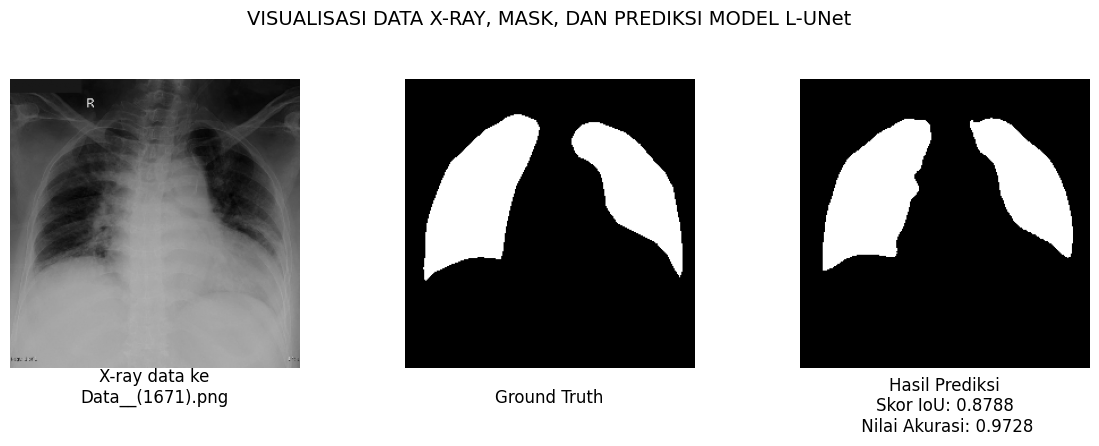

Semua visualisasi telah disimpan di folder: Visualisasi hasil prediksi\L-UNet


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model


# --- 3. Hitung IoU & Akurasi ---
binary_iou = tf.keras.metrics.BinaryIoU(target_class_ids=[1], threshold=0.5)
accuracy = tf.keras.metrics.BinaryAccuracy()

iou_scores, accuracy_scores = [], []
# --- 2. Prediksi ---
predicted_masks = model2.predict(img_array)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)

for i in range(len(img_array)):
    binary_iou.update_state(mask_array[i], predicted_masks[i])
    iou_scores.append(binary_iou.result().numpy())
    binary_iou.reset_state()

    accuracy.update_state(mask_array[i], predicted_masks[i])
    accuracy_scores.append(accuracy.result().numpy())
    accuracy.reset_state()

print(f"Rata-rata IoU: {np.mean(iou_scores):.4f}")
print(f"Rata-rata Akurasi: {np.mean(accuracy_scores):.4f}")

# --- 4. Visualisasi ---
save_dir = r"Visualisasi hasil prediksi\L-UNet"  

for i in range(len(img_array)):
    plt.figure(figsize=(12, 4))
    plt.suptitle("VISUALISASI DATA X-RAY, MASK, DAN PREDIKSI MODEL L-UNet", fontsize=14, y=1.05)

    # X-ray
    plt.subplot(1, 3, 1)
    plt.imshow(img_array[i].squeeze(), cmap='gray')
    plt.title(f"X-ray data ke\n{filenames[i]}", y=-0.15)
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(mask_array[i].squeeze(), cmap='gray')
    plt.title("Ground Truth", y=-0.15)
    plt.axis("off")

    # Prediksi
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
    plt.title(f"Hasil Prediksi\nSkor IoU: {iou_scores[i]:.4f}\n Nilai Akurasi: {accuracy_scores[i]:.4f}", y=-0.25)
    plt.axis("off")

    plt.tight_layout()

    # Simpan dulu
    save_path = os.path.join(save_dir, f"visualisasi_prediksi_{i+1}_{filenames[i]}.png")
    plt.savefig(save_path, bbox_inches="tight", dpi=150)

    # Tampilkan (opsional)
    plt.show()

    plt.close()

print("Semua visualisasi telah disimpan di folder:", save_dir)

## SIMPAN HASIL PREDIKSI 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# --- 2. Prediksi ---
predicted_masks = model2.predict(img_array)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)

# --- 4. simpan hasil prediksi pada satu folder ---
save_dir = r"Hasil_Prediksi_Model\L-UNet"
for i in range(len(predicted_masks)):
    # Ambil mask, ubah ke skala 0-255
    mask_img = (predicted_masks[i].squeeze() * 255).astype(np.uint8)

    # Resize ke 256x256
    mask_resized = cv2.resize(mask_img, (256, 256), interpolation=cv2.INTER_NEAREST)

    # Simpan ke folder
    save_path = os.path.join(save_dir, f"prediksi_{filenames[i]}.png")
    cv2.imwrite(save_path, mask_resized)
print("Semua visualisasi telah disimpan di folder:", save_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Semua visualisasi telah disimpan di folder: Hasil_Prediksi_Model\L-UNet


## Hasil prediksi model U-Net

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# --- 2. Prediksi ---
predicted_masks = model.predict(img_array)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)

# --- 4. simpan hasil prediksi pada satu folder ---
save_dir = r"Hasil_Prediksi_Model\U-Net"
for i in range(len(predicted_masks)):
    # Ambil mask, ubah ke skala 0-255
    mask_img = (predicted_masks[i].squeeze() * 255).astype(np.uint8)

    # Resize ke 256x256
    mask_resized = cv2.resize(mask_img, (256, 256), interpolation=cv2.INTER_NEAREST)

    # Simpan ke folder
    save_path = os.path.join(save_dir, f"prediksi_{filenames[i]}.png")
    cv2.imwrite(save_path, mask_resized)
print("Semua visualisasi telah disimpan di folder:", save_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Semua visualisasi telah disimpan di folder: Hasil_Prediksi_Model\U-Net
